# Using Machine Learning in Autism Diagnostics


The <a href="https://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult">dataset</a> at hand is comprehensive, encompassing screening test details for 704 adults who have been diagnosed with Autistic Spectrum Disorder (ASD). It comprises 21 attributes, providing demographic information about the test takers, along with responses to 10 questions from the screening tests. The diagnosis status of ASD for each individual is denoted in the "Class/ASD" variable.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
    import numpy as np
    import pandas as pd
    pd.set_option("display.max_columns", 100)
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

    import scipy
    from scipy.io.arff import loadarff as load_arff
    import collections
    from collections import Counter

    import sklearn
    import random
    import pickle
    import os
    from sklearn.model_selection import train_test_split
    import time
    from sklearn.metrics import classification_report, accuracy_score
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix

    random.seed(0)
    np.random.seed(0)

# Data Preprocessing

In [3]:
given_data = load_arff('./Autism-Adult-Data.arff')

df_data = pd.DataFrame(given_data[0])
df_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',26.0,b'f',b'White-European',b'no',b'no',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',24.0,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',27.0,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',35.0,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',40.0,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,b'18 and more',b'?',b'NO'


In [4]:
df_meta = list(given_data[1])
print("List of Variables:", df_meta)

List of Variables: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD']


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    object 
 1   A2_Score         704 non-null    object 
 2   A3_Score         704 non-null    object 
 3   A4_Score         704 non-null    object 
 4   A5_Score         704 non-null    object 
 5   A6_Score         704 non-null    object 
 6   A7_Score         704 non-null    object 
 7   A8_Score         704 non-null    object 
 8   A9_Score         704 non-null    object 
 9   A10_Score        704 non-null    object 
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [6]:
object_dtype_variables = df_data.select_dtypes([np.object_]).columns.to_list()
print("Object Datatype Features:", object_dtype_variables)

df_data.select_dtypes([np.object_]).head()

Object Datatype Features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'f',b'White-European',b'no',b'no',b'United States',b'no',b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'f',b'White-European',b'no',b'yes',b'United States',b'no',b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',b'f',b'?',b'no',b'no',b'Egypt',b'no',b'18 and more',b'?',b'NO'


In [7]:
for i in object_dtype_variables:
    df_data[i] = df_data[i].str.decode('utf-8')

df_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [8]:
df_data.rename(columns = {'contry_of_res':'Country_of_res'}, inplace = True)

df_data.rename(columns = {'age':'Age',
                         'gender':'Gender',
                         'ethnicity':'Ethnicity',
                         'jundice':'Jundice',
                         'austim':'Austim',
                         'used_app_before': 'Used_app_before',
                         'result':'Result',
                         'age_desc':'Age_desc',
                         'relation':'Relation'}, inplace=True)

In [9]:
df_data.describe()

,Age,Result
count,702.000000,704.000000
mean,29.698006,4.875000
std,16.507465,2.501493
min,17.000000,0.000000
25%,21.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,7.000000
max,383.000000,10.000000


In [10]:
for i in df_data.columns:
    if i.startswith("A") and i.endswith("_Score"):
        df_data[i] = df_data[i].astype(int)

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int32  
 1   A2_Score         704 non-null    int32  
 2   A3_Score         704 non-null    int32  
 3   A4_Score         704 non-null    int32  
 4   A5_Score         704 non-null    int32  
 5   A6_Score         704 non-null    int32  
 6   A7_Score         704 non-null    int32  
 7   A8_Score         704 non-null    int32  
 8   A9_Score         704 non-null    int32  
 9   A10_Score        704 non-null    int32  
 10  Age              702 non-null    float64
 11  Gender           704 non-null    object 
 12  Ethnicity        704 non-null    object 
 13  Jundice          704 non-null    object 
 14  Austim           704 non-null    object 
 15  Country_of_res   704 non-null    object 
 16  Used_app_before  704 non-null    object 
 17  Result          

In [11]:
df_data.shape

(704, 21)

In [12]:
df_data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
Age                2
Gender             0
Ethnicity          0
Jundice            0
Austim             0
Country_of_res     0
Used_app_before    0
Result             0
Age_desc           0
Relation           0
Class/ASD          0
dtype: int64

In [13]:
df_data['Age'].describe()

count    702.000000
mean      29.698006
std       16.507465
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max      383.000000
Name: Age, dtype: float64

In [14]:
# 2 datapoints with 'Age' missing values, drop them
df_data = df_data.loc[~(df_data.Age.isnull()),:]

In [15]:
dict_age = dict(Counter(df_data["Age"]))
dict_age_sorted = {i: dict_age[i] for i in sorted(list(dict_age.keys()))}
print("Age data with sample count:\n", dict_age_sorted)

Age data with sample count:
 {17.0: 18, 18.0: 31, 19.0: 35, 20.0: 46, 21.0: 49, 22.0: 37, 23.0: 37, 24.0: 34, 25.0: 27, 26.0: 28, 27.0: 31, 28.0: 24, 29.0: 27, 30.0: 30, 31.0: 21, 32.0: 18, 33.0: 16, 34.0: 12, 35.0: 17, 36.0: 13, 37.0: 17, 38.0: 12, 39.0: 7, 40.0: 16, 41.0: 3, 42.0: 15, 43.0: 11, 44.0: 10, 45.0: 4, 46.0: 6, 47.0: 8, 48.0: 4, 49.0: 3, 50.0: 5, 51.0: 1, 52.0: 5, 53.0: 6, 54.0: 2, 55.0: 6, 56.0: 2, 58.0: 2, 59.0: 1, 60.0: 1, 61.0: 2, 64.0: 1, 383.0: 1}


In [16]:
# Drop all the values above 120 (max human age)
df_data = df_data.loc[~(df_data.Age>120), :]

df_data['Age'] = df_data.Age.astype(int)

dict_age_new = dict(Counter(df_data["Age"]))
dict_age_sorted_new = {i: dict_age[i] for i in sorted(list(dict_age.keys()))}
print("Age data (integer) with sample count:\n", dict_age_sorted_new)

Age data (integer) with sample count:
 {17.0: 18, 18.0: 31, 19.0: 35, 20.0: 46, 21.0: 49, 22.0: 37, 23.0: 37, 24.0: 34, 25.0: 27, 26.0: 28, 27.0: 31, 28.0: 24, 29.0: 27, 30.0: 30, 31.0: 21, 32.0: 18, 33.0: 16, 34.0: 12, 35.0: 17, 36.0: 13, 37.0: 17, 38.0: 12, 39.0: 7, 40.0: 16, 41.0: 3, 42.0: 15, 43.0: 11, 44.0: 10, 45.0: 4, 46.0: 6, 47.0: 8, 48.0: 4, 49.0: 3, 50.0: 5, 51.0: 1, 52.0: 5, 53.0: 6, 54.0: 2, 55.0: 6, 56.0: 2, 58.0: 2, 59.0: 1, 60.0: 1, 61.0: 2, 64.0: 1, 383.0: 1}


In [17]:
df_data['Result'] = df_data.Result.astype(int)

In [18]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         701 non-null    int32 
 1   A2_Score         701 non-null    int32 
 2   A3_Score         701 non-null    int32 
 3   A4_Score         701 non-null    int32 
 4   A5_Score         701 non-null    int32 
 5   A6_Score         701 non-null    int32 
 6   A7_Score         701 non-null    int32 
 7   A8_Score         701 non-null    int32 
 8   A9_Score         701 non-null    int32 
 9   A10_Score        701 non-null    int32 
 10  Age              701 non-null    int32 
 11  Gender           701 non-null    object
 12  Ethnicity        701 non-null    object
 13  Jundice          701 non-null    object
 14  Austim           701 non-null    object
 15  Country_of_res   701 non-null    object
 16  Used_app_before  701 non-null    object
 17  Result           701 non-null    int32 


In [19]:
object_dtype_variables = df_data.select_dtypes([np.object_]).columns.to_list()
for i in object_dtype_variables:
    print(f"Unique values of '{i}' variable:' {set(df_data[i])}")
    print(f"Number of unique items in '{i}':'{len(set(df_data[i]))}\n")

Unique values of 'Gender' variable:' {'m', 'f'}
Number of unique items in 'Gender':'2

Unique values of 'Ethnicity' variable:' {'Hispanic', 'Others', 'Pasifika', 'Asian', 'South Asian', 'others', 'Turkish', 'White-European', 'Latino', 'Black', 'Middle Eastern ', '?'}
Number of unique items in 'Ethnicity':'12

Unique values of 'Jundice' variable:' {'yes', 'no'}
Number of unique items in 'Jundice':'2

Unique values of 'Austim' variable:' {'yes', 'no'}
Number of unique items in 'Austim':'2

Unique values of 'Country_of_res' variable:' {'Jordan', 'Indonesia', 'Costa Rica', 'Hong Kong', 'Russia', 'Australia', 'Japan', 'Iraq', 'Pakistan', 'Saudi Arabia', 'Malaysia', 'Mexico', 'China', 'Sweden', 'Austria', 'Niger', 'India', 'Spain', 'Egypt', 'Sierra Leone', 'Aruba', 'Philippines', 'Argentina', 'Romania', 'Nicaragua', 'Italy', 'Germany', 'United States', 'Serbia', 'Turkey', 'Belgium', 'Oman', 'Iceland', 'France', 'Kazakhstan', 'Sri Lanka', 'Portugal', 'Bangladesh', 'Tonga', 'Uruguay', 'Bolivia

In [20]:
df_data['Age_desc'] = np.where(df_data['Age']<18, 'Less than 18', df_data['Age_desc'])

df_data['Age_desc'].value_counts()

Age_desc
18 and more     683
Less than 18     18
Name: count, dtype: int64

In [21]:
df_data['Relation'].value_counts()

Relation
Self                        521
?                            93
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: count, dtype: int64

In [22]:
df_data['Ethnicity'].value_counts()

Ethnicity
White-European     233
Asian              123
?                   93
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
others               1
Name: count, dtype: int64

In [23]:
print(round(100*len(df_data.loc[((df_data.Relation=='?') & (df_data.Ethnicity=='?')), :])/len(df_data),3),"%")

13.267 %


In [24]:
df = df_data.loc[((df_data.Relation!='?') & (df_data.Ethnicity!='?')),:]

df['Ethnicity'] = df['Ethnicity'].replace('others', 'Others')

In [25]:
df["Country_of_res"] = df["Country_of_res"].replace('AmericanSamoa', 'American Samoa')

In [26]:
!pip install pycountry_convert


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/6.2 MB 1.3 MB/s eta 0:00:05
    --------------------------------------- 0.2/6.2 MB 1.8 MB/s eta 0:00:04
   - -------------------------------------- 0.3/6.2 MB 2.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.3/6.2 MB 2.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.5/6.2 MB 2.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/6.2 MB 2.4 MB/s eta 0:00:03
   ---- ----------------------------------- 0.7/6.2 MB 2.3 MB/s eta 0:00:03
   ----- ---------------------------------- 0.8/6.2 MB 2.4 MB/s eta 0:00:03
   ----- ---------------------------------- 0.9/6.2 MB 2.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.0/6.2 MB 2.3 MB/s eta 0:00:03
   ------- -------------------------------- 1.1/6.2 MB 2.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.2/6.2 MB 2.3 MB/s eta 0:00:03
   -------- -------

In [27]:
import pycountry_convert as pc
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df['Continent'] = df['Country_of_res'].apply(lambda x: country_to_continent(x))

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Austim,Country_of_res,Used_app_before,Result,Age_desc,Relation,Class/ASD,Continent
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,18 and more,Self,NO,North America
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO,South America
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES,Europe
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,18 and more,Self,NO,North America
5,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,United States,no,9,18 and more,Self,YES,North America


In [28]:
df = df.drop(["Country_of_res"], axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         608 non-null    int32 
 1   A2_Score         608 non-null    int32 
 2   A3_Score         608 non-null    int32 
 3   A4_Score         608 non-null    int32 
 4   A5_Score         608 non-null    int32 
 5   A6_Score         608 non-null    int32 
 6   A7_Score         608 non-null    int32 
 7   A8_Score         608 non-null    int32 
 8   A9_Score         608 non-null    int32 
 9   A10_Score        608 non-null    int32 
 10  Age              608 non-null    int32 
 11  Gender           608 non-null    object
 12  Ethnicity        608 non-null    object
 13  Jundice          608 non-null    object
 14  Austim           608 non-null    object
 15  Used_app_before  608 non-null    object
 16  Result           608 non-null    int32 
 17  Age_desc         608 non-null    object


In [30]:
## One-hot encode categorical values

df['Gender'] = df['Gender'].map({'m': 1, 'f': 0})
df['Jundice'] = df['Jundice'].map({'yes': 1, 'no': 0})
df['Austim'] = df['Austim'].map({'yes': 1, 'no': 0})
df['Used_app_before'] = df['Used_app_before'].map({'yes': 1, 'no': 0})
df['Age_desc'] = df['Age_desc'].map({'18 and more': 1, 'Less than 18': 0})
df['Class/ASD'] = df['Class/ASD'].map({'YES': 1, 'NO': 0})

df = pd.get_dummies(df, drop_first=False)

# Final dataset (preprocesssed)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Jundice,Austim,Used_app_before,Result,Age_desc,Class/ASD,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Others,Ethnicity_Pasifika,Ethnicity_South Asian,Ethnicity_Turkish,Ethnicity_White-European,Relation_Health care professional,Relation_Others,Relation_Parent,Relation_Relative,Relation_Self,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0,0,6,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1,0,5,1,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,1,1,0,1,1,0,1,1,1,1,27,1,1,1,0,8,1,1,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
3,1,1,0,1,0,0,1,1,0,1,35,0,0,1,0,6,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
5,1,1,1,1,1,0,1,1,1,1,36,1,1,0,0,9,1,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False


In [31]:
df.shape

(608, 39)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 703
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   A1_Score                           608 non-null    int32
 1   A2_Score                           608 non-null    int32
 2   A3_Score                           608 non-null    int32
 3   A4_Score                           608 non-null    int32
 4   A5_Score                           608 non-null    int32
 5   A6_Score                           608 non-null    int32
 6   A7_Score                           608 non-null    int32
 7   A8_Score                           608 non-null    int32
 8   A9_Score                           608 non-null    int32
 9   A10_Score                          608 non-null    int32
 10  Age                                608 non-null    int32
 11  Gender                             608 non-null    int64
 12  Jundice                    

# Getting Input and Output Features

In [33]:
x = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']

In [34]:
X = pd.get_dummies(x)

In [35]:
X.columns.values

array(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age',
       'Gender', 'Jundice', 'Austim', 'Used_app_before', 'Result',
       'Age_desc', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Hispanic', 'Ethnicity_Latino',
       'Ethnicity_Middle Eastern ', 'Ethnicity_Others',
       'Ethnicity_Pasifika', 'Ethnicity_South Asian', 'Ethnicity_Turkish',
       'Ethnicity_White-European', 'Relation_Health care professional',
       'Relation_Others', 'Relation_Parent', 'Relation_Relative',
       'Relation_Self', 'Continent_Africa', 'Continent_Asia',
       'Continent_Europe', 'Continent_North America', 'Continent_Oceania',
       'Continent_South America'], dtype=object)

In [36]:
Y = pd.get_dummies(y)

In [37]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

In [38]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(486, 38) (486, 2)
(122, 38) (122, 2)


# Model Building - Neural Network

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=38, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))

    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 312       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
Total params: 358 (1.40 KB)
Trainable params: 358 (1.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
X_train.shape
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [45]:
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose = 1)

Epoch 1/50
49/49 [==============================] - 1s 3ms/step - loss: 0.6149 - accuracy: 0.6955
Epoch 2/50
49/49 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.6955
Epoch 3/50
49/49 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.6955
Epoch 4/50
49/49 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.6955
Epoch 5/50
49/49 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.6955
Epoch 6/50
49/49 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.7016
Epoch 7/50
49/49 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8889
Epoch 8/50
49/49 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.9012
Epoch 9/50
49/49 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.9115
Epoch 10/50
49/49 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.9198
Epoch 11/50
49/49 [

# Evaluation

In [47]:
from sklearn.metrics import classification_report, accuracy_score
X_test=X_test.astype('float32')
Y_pred = np.argmax(model.predict(X_test),axis=1)
Y_pred

4/4 [==============================] - 0s 2ms/step


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
y_test=y_test.astype('int')
print('Results for Neural Network Model')
print(accuracy_score(y_test[[1]], Y_pred))
print(classification_report(y_test[[1]], Y_pred))

Results for Neural Network Model
0.9344262295081968
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        90
           1       0.85      0.91      0.88        32

    accuracy                           0.93       122
   macro avg       0.91      0.93      0.92       122
weighted avg       0.94      0.93      0.94       122



# Confusion Matrix

4/4 [==============================] - 0s 3ms/step


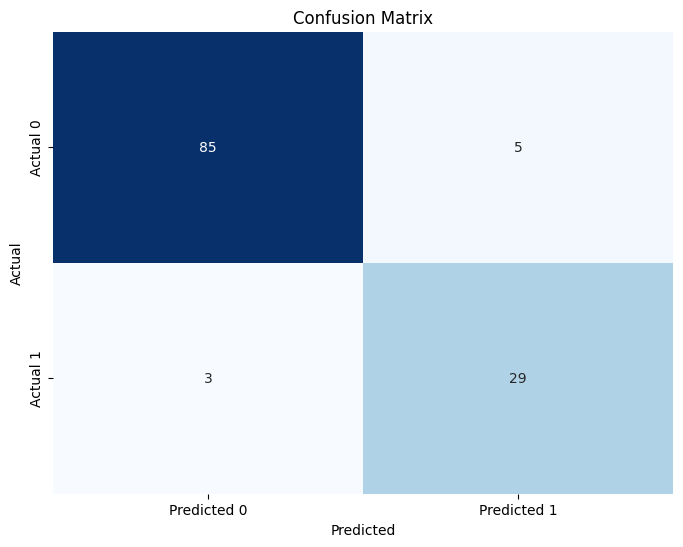

In [50]:
Y_pred = np.argmax(model.predict(X_test),axis=1)

cm = confusion_matrix(np.argmax(y_test.to_numpy(),axis=1), Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)

In [67]:
dt1=DecisionTreeClassifier()
dt1.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
Y_pred1 = np.argmax(dt1.predict(X_test),axis=1)
Y_pred1

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
print('Results for Decision Tree Model')
print(accuracy_score(y_test[[1]], Y_pred1))
print(classification_report(y_test[[1]], Y_pred1))

Results for Decision Tree Model
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        32

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122



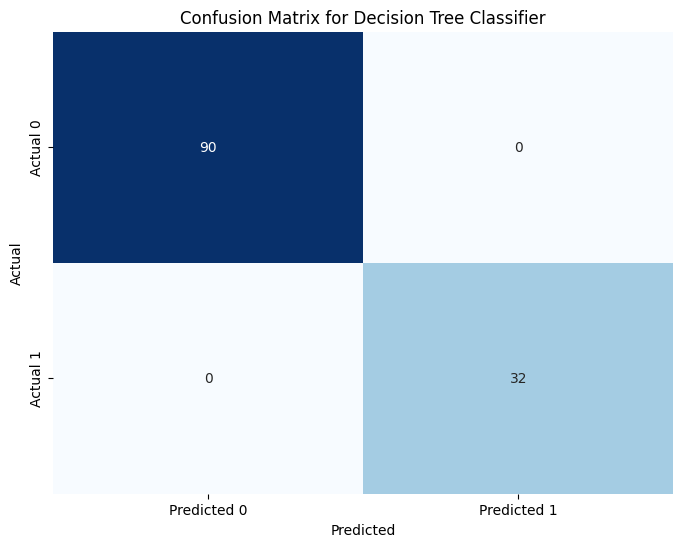

In [72]:
Y_pred1 = np.argmax(dt1.predict(X_test),axis=1)

cm1= confusion_matrix(np.argmax(y_test.to_numpy(),axis=1), Y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf1=RandomForestClassifier(n_estimators= 250,criterion= 'entropy', max_depth= 4, min_samples_leaf= 2, min_samples_split= 4,class_weight='balanced')
rf1.fit(X_train,y_train)

In [75]:
rf1=RandomForestClassifier(n_estimators= 250,criterion= 'entropy', max_depth= 4, min_samples_leaf= 2, min_samples_split= 4,class_weight='balanced')
rf1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=250)

In [76]:
Y_pred2 = np.argmax(rf1.predict(X_test),axis=1)
Y_pred2

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [77]:
print('Results for Random Forest Model')
print(accuracy_score(y_test[[1]], Y_pred2))
print(classification_report(y_test[[1]], Y_pred2))

Results for Random Forest Model
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        32

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122



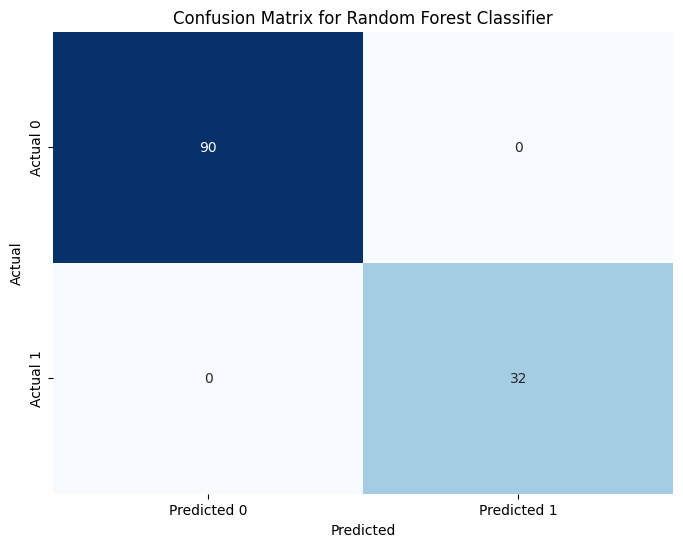

In [78]:
Y_pred2 = np.argmax(rf1.predict(X_test),axis=1)

cm2= confusion_matrix(np.argmax(y_test.to_numpy(),axis=1), Y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Support Vector Classifier

In [79]:
from sklearn.svm import SVC
sc=SVC()
sc1=SVC(C= 0.001, gamma= 100, kernel='poly')
sc1.fit(X_train,y_train[1])

In [82]:
sc1=SVC(C= 0.001, gamma= 100, kernel='poly')
sc1.fit(X_train,y_train[1])

SVC(C=0.001, gamma=100, kernel='poly')

In [84]:
Y_pred3 = sc1.predict(X_test)
Y_pred3

array([1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [85]:
print('Results for Support Vector Model')
print(accuracy_score(y_test[[1]], Y_pred3))
print(classification_report(y_test[[1]], Y_pred3))

Results for Support Vector Model
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        32

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122



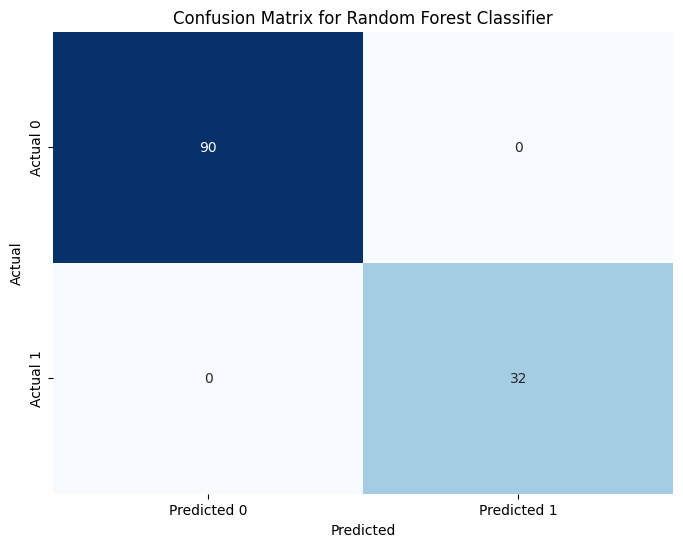

In [90]:
Y_pred3 = sc1.predict(X_test)

cm3= confusion_matrix(y_test[1], Y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

The effectiveness of the classifier is significantly influenced by the inclusion of demographic details and responses to the 10-question questionnaire. Integrating this classifier into an Autistic Spectrum Disorder (ASD) Screening app has the potential to offer substantial advantages to individuals, families, and society at large by delivering timely support.